# torch代码测试部分

In [2]:
# encoding:utf-8
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn

C:\Users\DN\anaconda3\envs\python36\lib\site-packages\numpy\__init__.py:138: UserWarning: mkl-service package failed to import, therefore Intel(R) MKL initialization ensuring its correct out-of-the box operation under condition when Gnu OpenMP had already been loaded by Python process is not assured. Please install mkl-service package, see http://github.com/IntelPython/mkl-service
  from . import _distributor_init


In [17]:
# 定义RNN模型(可以类别下方RNN简单测试代码理解)
class Rnn(nn.Module):
    def __init__(self, input_size):
        super(Rnn, self).__init__()
        # 定义RNN网络
        ## hidden_size是自己设置的，貌似取值都是32,64,128这样来取值
        ## num_layers是隐藏层数量，超过2层那就是深度循环神经网络了
        self.rnn = nn.RNN(
                input_size=input_size,
                hidden_size=32,
                num_layers=1,
                batch_first=True  # 输入形状为[批量大小, 数据序列长度, 特征维度]
                )
        # 定义全连接层
        self.out = nn.Linear(32, 1)

    # 定义前向传播函数
    def forward(self, x, h_0):
        r_out, h_n = self.rnn(x, h_0)
        # print("数据输出结果；隐藏层数据结果", r_out, h_n)
        # print("r_out.size()， h_n.size()", r_out.size(), h_n.size())
        outs = []
        # r_out.size=[1,10,32]即将一个长度为10的序列的每个元素都映射到隐藏层上
        for time in range(r_out.size(1)):  
            # print("映射", r_out[:, time, :])
            # 依次抽取序列中每个单词,将之通过全连接层并输出.r_out[:, 0, :].size()=[1,32] -> [1,1]
            outs.append(self.out(r_out[:, time, :])) 
            # print("outs", outs)
        # stack函数在dim=1上叠加:10*[1,1] -> [1,10,1] 同时h_n已经被更新
        return torch.stack(outs, dim=1), h_n 

In [18]:
TIME_STEP = 10
INPUT_SIZE = 1
LR = 0.02
model = Rnn(INPUT_SIZE)
print(model)

# 此处使用的是均方误差损失
loss_func = nn.MSELoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

h_state = None  # 初始化h_state为None

Rnn(
  (rnn): RNN(1, 32, batch_first=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)


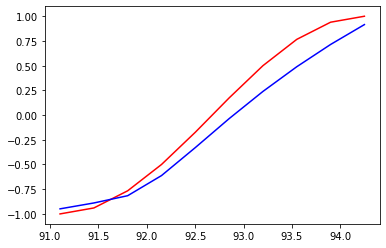

In [19]:
for step in range(30):
    # 人工生成输入和输出,输入x.size=[1,10,1],输出y.size=[1,10,1]
    start, end = step * np.pi, (step + 1)*np.pi
    # np.linspace生成一个指定大小，指定数据区间的均匀分布序列，TIME_STEP是生成数量
    steps = np.linspace(start, end, TIME_STEP, dtype=np.float32) 
    # print("steps", steps)
    x_np = np.sin(steps)
    y_np = np.cos(steps)
    # print("x_np,y_np", x_np, y_np)
    # 从numpy.ndarray创建一个张量 np.newaxis增加新的维度
    x = torch.from_numpy(x_np[np.newaxis, :, np.newaxis])
    y = torch.from_numpy(y_np[np.newaxis, :, np.newaxis])
    # print("x,y", x,y)

    # 将x通过网络,长度为10的序列通过网络得到最终隐藏层状态h_state和长度为10的输出prediction:[1,10,1]
    prediction, h_state = model(x, h_state)
    h_state = h_state.data  # 这一步只取了h_state.data.因为h_state包含.data和.grad 舍弃了梯度
    # print("precision, h_state.data", prediction, h_state)
    # print("prediction.size(), h_state.size()", prediction.size(), h_state.size())
    
    # 反向传播
    loss = loss_func(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    # 更新优化器参数
    optimizer.step()

# 对最后一次的结果作图查看网络的预测效果
plt.plot(steps, y_np.flatten(), 'r-')
plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
plt.show()

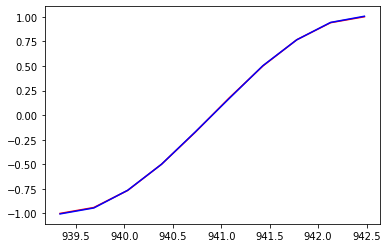

In [20]:
for step in range(300):
    # 人工生成输入和输出,输入x.size=[1,10,1],输出y.size=[1,10,1]
    start, end = step * np.pi, (step + 1)*np.pi
    # np.linspace生成一个指定大小，指定数据区间的均匀分布序列，TIME_STEP是生成数量
    steps = np.linspace(start, end, TIME_STEP, dtype=np.float32) 
    # print("steps", steps)
    x_np = np.sin(steps)
    y_np = np.cos(steps)
    # print("x_np,y_np", x_np, y_np)
    # 从numpy.ndarray创建一个张量 np.newaxis增加新的维度
    x = torch.from_numpy(x_np[np.newaxis, :, np.newaxis])
    y = torch.from_numpy(y_np[np.newaxis, :, np.newaxis])
    # print("x,y", x,y)

    # 将x通过网络,长度为10的序列通过网络得到最终隐藏层状态h_state和长度为10的输出prediction:[1,10,1]
    prediction, h_state = model(x, h_state)
    h_state = h_state.data  
    # 这一步只取了h_state.data.因为h_state包含.data和.grad 舍弃了梯度
    # print("precision, h_state.data", prediction, h_state)
    # print("prediction.size(), h_state.size()", prediction.size(), h_state.size())
    
    # 反向传播
    loss = loss_func(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    # 更新优化器参数
    optimizer.step()

# 对最后一次的结果作图查看网络的预测效果
plt.plot(steps, y_np.flatten(), 'r-')
plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
plt.show()

# 上述代码打印数据结果展示

## 根据生成区间依次生成序列，根据序列分别生成sin，cos值作为输入，输出值，并转换成torch形式

In [ ]:
# steps [0.         0.34906584 0.6981317  1.0471976  1.3962634  1.7453293 2.0943952  2.443461   2.7925267  3.1415927 ]  区间：【0 -Π】
# x_np [ 0.0000000e+00  3.4202012e-01  6.4278758e-01  8.6602545e-01 9.8480773e-01  9.8480773e-01  8.6602539e-01  6.4278764e-01 
#                                                                                                           3.4202021e-01 -8.7422777e-08] 
# y_np [ 1.          0.9396926   0.76604444  0.49999997  0.17364822 -0.1736482 -0.50000006 -0.76604444 -0.9396926  -1.        ]
# x：tensor([[[ 0.0000e+00],[ 3.4202e-01],[ 6.4279e-01],[ 8.6603e-01],[ 9.8481e-01],[ 9.8481e-01],[ 8.6603e-01],[ 6.4279e-01],
#                                                                                                           [ 3.4202e-01],[-8.7423e-08]]]) 
# y:tensor([[[ 1.0000],[ 0.9397],[ 0.7660],[ 0.5000],[ 0.1736],[-0.1736],[-0.5000],[-0.7660],[-0.9397],[-1.0000]]]) 四舍五入了

## 前向输出和权重结果以及各自size

In [ ]:
# r_out： tensor([[[-7.5348e-02,  2.5367e-01, -2.9205e-01,  1.5503e-01,  1.2660e-01,
#            5.5710e-02,  1.1780e-01,  8.9455e-03, -2.7481e-04,  1.5995e-01,
#           -2.6542e-01, -1.6131e-01, -1.1158e-01,  7.7050e-03, -8.3301e-02,
#           -1.8075e-01, -3.4060e-02, -2.8146e-01, -1.1836e-01, -2.4095e-01,
#           -9.7621e-02,  8.9161e-02, -9.7000e-02,  8.8020e-02,  4.8053e-02,
#           -1.1275e-02,  1.0916e-01, -3.4761e-02,  2.5369e-02, -5.5798e-03,
#            1.3054e-01,  7.7793e-03],
#          [-1.7607e-01,  2.6252e-01, -2.6909e-01,  5.6675e-02,  2.8411e-01,
#            5.0558e-02, -1.4566e-02,  1.9358e-02, -5.0257e-02,  2.1032e-01,
#           -2.8118e-01, -1.0482e-01,  1.4296e-02,  5.8765e-02, -8.5005e-02,
#           -2.5845e-01,  8.0732e-02, -1.0394e-01, -9.9547e-02, -2.1740e-01,
#           -1.8070e-01, -1.4624e-01, -1.5195e-01, -1.2142e-01,  1.1917e-01,
#           -2.3249e-02,  1.8602e-02, -7.1787e-03,  7.6554e-02, -1.8960e-01,
#            1.9625e-01,  4.0727e-02],
#          [-1.0307e-01,  3.1680e-01, -1.7098e-01,  9.4733e-02,  2.6265e-01,
#            4.1288e-02, -5.2903e-04,  9.6333e-02, -6.7318e-02,  2.4091e-01,
#           -3.8328e-01, -2.0109e-01, -7.6820e-02,  2.2822e-02, -9.6577e-02,
#           -1.7966e-01, -1.1084e-02, -1.2091e-01, -8.4175e-02, -1.4317e-01,
#           -2.1504e-01, -1.6924e-01, -2.9991e-01, -2.0982e-02,  2.0625e-01,
#           -3.0199e-02, -8.3504e-02, -5.1661e-02,  3.2262e-02, -1.4524e-01,
#            9.7231e-02,  8.8703e-02],
#          [-1.3407e-01,  2.8562e-01, -1.8797e-01,  6.8879e-02,  3.2319e-01,
#            2.2306e-02, -4.5192e-02,  1.2292e-01, -2.4388e-02,  2.4388e-01,
#           -3.6287e-01, -1.7392e-01, -5.4650e-02,  3.3481e-02,  4.0082e-03,
#           -1.4224e-01,  5.6147e-02, -1.4018e-01, -9.9739e-02, -1.2549e-01,
#           -2.2483e-01, -1.2046e-01, -4.2029e-01, -7.1535e-02,  2.0343e-01,
#           -4.6649e-02, -9.8127e-02, -3.5879e-04,  6.1566e-02, -1.0376e-01,
#            4.4366e-02,  1.1446e-01],
#          [-1.3313e-01,  3.0172e-01, -1.6129e-01,  1.1043e-01,  3.2629e-01,
#           -1.4746e-02, -5.5054e-02,  2.0320e-01, -1.3918e-02,  2.6882e-01,
#           -3.8898e-01, -1.5583e-01, -4.7491e-02,  1.8751e-02,  6.4178e-02,
#           -1.7791e-01,  8.6884e-02, -1.3567e-01, -8.8821e-02, -1.0527e-01,
#           -2.5965e-01, -1.2416e-01, -4.6379e-01, -4.5572e-02,  1.5946e-01,
#           -6.7386e-03, -1.3952e-01, -1.6210e-02,  4.4490e-02, -8.8569e-02,
#            1.8270e-02,  1.2177e-01],
#          [-1.3320e-01,  2.8764e-01, -1.6304e-01,  9.7717e-02,  3.5748e-01,
#           -2.2103e-02, -3.5123e-02,  2.3838e-01, -2.4081e-02,  2.5827e-01,
#           -3.8870e-01, -1.2824e-01, -4.2807e-02,  6.7024e-03,  7.7827e-02,
#           -1.8253e-01,  1.1834e-01, -1.5021e-01, -7.0380e-02, -1.2611e-01,
#           -2.4141e-01, -1.1462e-01, -4.7215e-01, -6.3981e-02,  1.4042e-01,
#            2.2405e-02, -1.5446e-01, -3.8715e-02,  2.9669e-02, -7.1921e-02,
#            1.0826e-02,  1.4842e-01],
#          [-1.3742e-01,  2.9135e-01, -1.6732e-01,  9.0955e-02,  3.4517e-01,
#           -1.5723e-02, -2.9030e-02,  2.2639e-01, -5.5516e-02,  2.5367e-01,
#           -3.8347e-01, -1.3367e-01, -2.7652e-02,  5.3181e-03,  7.1721e-02,
#           -1.9643e-01,  1.5053e-01, -1.6074e-01, -4.4241e-02, -1.3433e-01,
#           -2.2499e-01, -1.0458e-01, -4.4429e-01, -4.6228e-02,  1.3323e-01,
#            5.5190e-02, -1.5061e-01, -5.3884e-02,  1.1042e-02, -7.6921e-02,
#            2.2925e-02,  1.4836e-01],
#          [-1.4483e-01,  3.0032e-01, -1.9205e-01,  6.7978e-02,  3.3704e-01,
#           -3.2972e-03,  3.1976e-03,  1.8934e-01, -8.2365e-02,  2.3374e-01,
#           -3.5901e-01, -1.5824e-01, -3.1652e-02, -5.0233e-03,  3.6933e-02,
#           -1.9255e-01,  1.6220e-01, -1.8065e-01, -2.8589e-02, -1.5817e-01,
#           -1.9499e-01, -9.3100e-02, -3.9589e-01, -2.4390e-02,  1.1468e-01,
#            7.0699e-02, -1.3375e-01, -7.6296e-02, -3.8436e-03, -8.0293e-02,
#            5.5356e-02,  1.4760e-01],
#          [-1.4378e-01,  3.1206e-01, -2.3469e-01,  3.5290e-02,  3.1418e-01,
#            3.1961e-02,  2.8219e-02,  1.1966e-01, -1.1660e-01,  2.1165e-01,
#           -3.2617e-01, -1.9668e-01, -2.8759e-02, -1.5614e-02, -1.5808e-02,
#           -1.9752e-01,  1.7114e-01, -2.0254e-01, -1.2758e-02, -1.8045e-01,
#           -1.5384e-01, -7.8890e-02, -3.2250e-01,  1.7776e-04,  1.0494e-01,
#            8.4439e-02, -8.9070e-02, -9.5147e-02, -1.4687e-02, -9.9503e-02,
#            1.0774e-01,  1.3877e-01],
#          [-1.4437e-01,  3.3083e-01, -2.8030e-01,  1.8187e-03,  2.8432e-01,
#            6.9881e-02,  6.0145e-02,  3.3994e-02, -1.4821e-01,  1.8432e-01,
#           -2.8430e-01, -2.5014e-01, -3.0494e-02, -2.3834e-02, -8.0843e-02,
#           -1.9690e-01,  1.6717e-01, -2.1866e-01, -6.1181e-03, -2.0253e-01,
#           -1.1517e-01, -6.5613e-02, -2.3066e-01,  3.5291e-02,  9.3199e-02,
#            8.5283e-02, -3.8311e-02, -1.1278e-01, -2.1822e-02, -1.2922e-01,
#            1.6818e-01,  1.2240e-01]]], grad_fn=<TransposeBackward1>) 

# h_n：tensor([[[-0.1444,  0.3308, -0.2803,  0.0018,  0.2843,  0.0699,  0.0601,
#            0.0340, -0.1482,  0.1843, -0.2843, -0.2501, -0.0305, -0.0238,
#           -0.0808, -0.1969,  0.1672, -0.2187, -0.0061, -0.2025, -0.1152,
#           -0.0656, -0.2307,  0.0353,  0.0932,  0.0853, -0.0383, -0.1128,
#           -0.0218, -0.1292,  0.1682,  0.1224]]], grad_fn=<StackBackward>)

# r_out.size()， h_n.size() torch.Size([1, 10, 32]) torch.Size([1, 1, 32])
# size：output N * L* H h_n num_layers * N * H N是输入数据数量，L是序列大小，H是隐藏层节点数(自定义)

## 前向传播计算的返回结果

In [ ]:
# 依次加入(未全部粘贴)
# 映射的这个tensor就是上面r_out，outs中结果就是该tensor经过全连接层映射的结果
# 映射 tensor([[-7.5348e-02,  2.5367e-01, -2.9205e-01,  1.5503e-01,  1.2660e-01,
#           5.5710e-02,  1.1780e-01,  8.9455e-03, -2.7481e-04,  1.5995e-01,
#          -2.6542e-01, -1.6131e-01, -1.1158e-01,  7.7050e-03, -8.3301e-02,
#          -1.8075e-01, -3.4060e-02, -2.8146e-01, -1.1836e-01, -2.4095e-01,
#          -9.7621e-02,  8.9161e-02, -9.7000e-02,  8.8020e-02,  4.8053e-02,
#          -1.1275e-02,  1.0916e-01, -3.4761e-02,  2.5369e-02, -5.5798e-03,
#           1.3054e-01,  7.7793e-03]], grad_fn=<SliceBackward>)
# outs [tensor([[-0.0768]], grad_fn=<AddmmBackward>)]

# 映射 tensor([[-0.1761,  0.2625, -0.2691,  0.0567,  0.2841,  0.0506, -0.0146,  0.0194,
#          -0.0503,  0.2103, -0.2812, -0.1048,  0.0143,  0.0588, -0.0850, -0.2585,
#           0.0807, -0.1039, -0.0995, -0.2174, -0.1807, -0.1462, -0.1520, -0.1214,
#           0.1192, -0.0232,  0.0186, -0.0072,  0.0766, -0.1896,  0.1962,  0.0407]],
#        grad_fn=<SliceBackward>)
# outs [tensor([[-0.0768]], grad_fn=<AddmmBackward>), tensor([[-0.1371]], grad_fn=<AddmmBackward>)]

# 映射 tensor([[-0.1031,  0.3168, -0.1710,  0.0947,  0.2627,  0.0413, -0.0005,  0.0963,
#          -0.0673,  0.2409, -0.3833, -0.2011, -0.0768,  0.0228, -0.0966, -0.1797,
#          -0.0111, -0.1209, -0.0842, -0.1432, -0.2150, -0.1692, -0.2999, -0.0210,
#           0.2062, -0.0302, -0.0835, -0.0517,  0.0323, -0.1452,  0.0972,  0.0887]],
#        grad_fn=<SliceBackward>)
# outs [tensor([[-0.0768]], grad_fn=<AddmmBackward>), tensor([[-0.1371]], grad_fn=<AddmmBackward>), tensor([[-0.1101]], grad_fn=<AddmmBackward>)]

# 映射 tensor([[-1.3407e-01,  2.8562e-01, -1.8797e-01,  6.8879e-02,  3.2319e-01,
#           2.2306e-02, -4.5192e-02,  1.2292e-01, -2.4388e-02,  2.4388e-01,
#          -3.6287e-01, -1.7392e-01, -5.4650e-02,  3.3481e-02,  4.0082e-03,
#          -1.4224e-01,  5.6147e-02, -1.4018e-01, -9.9739e-02, -1.2549e-01,
#          -2.2483e-01, -1.2046e-01, -4.2029e-01, -7.1535e-02,  2.0343e-01,
#          -4.6649e-02, -9.8127e-02, -3.5879e-04,  6.1566e-02, -1.0376e-01,
#           4.4366e-02,  1.1446e-01]], grad_fn=<SliceBackward>)
# outs [tensor([[-0.0768]], grad_fn=<AddmmBackward>), tensor([[-0.1371]], grad_fn=<AddmmBackward>), tensor([[-0.1101]], grad_fn=<AddmmBackward>), tensor([[-0.0807]], grad_fn=<AddmmBackward>)]

## 前向传播的最终结果

In [ ]:
# 这个其实就是上面outs列表中的数
# precision： tensor([[[-0.0768],
#          [-0.1371],
#          [-0.1101],
#          [-0.0807],
#          [-0.0754],
#          [-0.0794],
#          [-0.0867],
#          [-0.0994],
#          [-0.1135],
#          [-0.1298]]], grad_fn=<StackBackward>) 

# h_state.data: tensor([[[-0.1444,  0.3308, -0.2803,  0.0018,  0.2843,  0.0699,  0.0601,
#                   0.0340, -0.1482,  0.1843, -0.2843, -0.2501, -0.0305, -0.0238,
#                   -0.0808, -0.1969,  0.1672, -0.2187, -0.0061, -0.2025, -0.1152,
#                   -0.0656, -0.2307,  0.0353,  0.0932,  0.0853, -0.0383, -0.1128,
#                   -0.0218, -0.1292,  0.1682,  0.1224]]])

# prediction那个32经过全连接层后被映射成1
# prediction.size(), h_state.size() torch.Size([1, 10, 1]) torch.Size([1, 1, 32])

## 参考资料3的例子测试 https://blog.csdn.net/raelum/article/details/125311936

In [18]:
import torch
import torch.nn as nn

torch.manual_seed(42)
seq = torch.randn(4, 6)  
print(seq)
print(seq.shape)

tensor([[ 1.9269,  1.4873,  0.9007, -2.1055,  0.6784, -1.2345],
        [-0.0431, -1.6047,  0.3559, -0.6866, -0.4934,  0.2415],
        [-1.1109,  0.0915, -2.3169, -0.2168, -0.3097, -0.3957],
        [ 0.8034, -0.6216, -0.5920, -0.0631, -0.8286,  0.3309]])
torch.Size([4, 6])


### 定义输入数据

In [19]:
inputs = seq.unsqueeze(1)
print(inputs)
print(inputs.shape)

tensor([[[ 1.9269,  1.4873,  0.9007, -2.1055,  0.6784, -1.2345]],

        [[-0.0431, -1.6047,  0.3559, -0.6866, -0.4934,  0.2415]],

        [[-1.1109,  0.0915, -2.3169, -0.2168, -0.3097, -0.3957]],

        [[ 0.8034, -0.6216, -0.5920, -0.0631, -0.8286,  0.3309]]])
torch.Size([4, 1, 6])


### 初始化隐状态h_0

In [20]:
h_0 = torch.randn(1, 1, 3) # h_0形状 单向 num_layers × N × h  双向 2*num_layers × N × h

print(h_0)

tensor([[[ 1.3525,  0.6863, -0.3278]]])


In [21]:
rnn = nn.RNN(6, 3) # d * h d是维度，h是自定义的hidden_size
# h_n 代表最终的隐状态，形状为 num_layers × N × h 双向同理
outputs, h_n = rnn(inputs, h_0) 
print(outputs)
print(h_n)

tensor([[[-0.5428,  0.9207,  0.7060]],

        [[-0.2245,  0.2461, -0.4578]],

        [[ 0.5950, -0.3390, -0.4598]],

        [[ 0.9281, -0.7660,  0.5954]]], grad_fn=<StackBackward>)
tensor([[[ 0.9281, -0.7660,  0.5954]]], grad_fn=<StackBackward>)


### 另一种方法验证

In [22]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.W_ih = torch.randn(input_size, hidden_size)
        self.W_hh = torch.randn(hidden_size, hidden_size)
        self.b_ih = torch.randn(1, hidden_size)
        self.b_hh = torch.randn(1, hidden_size)

    def forward(self, inputs, h_0):
        L, N, d = inputs.shape  # 分别对应序列长度、批量大小和特征维度
        H = h_0[0]  # 因为h_0的形状为(1,N,h)，我们需要使用(N,h)去计算
        outputs = torch.zeros(L, N, H.shape[1])
        for t in range(L):
            X_t = inputs[t]
            H = torch.tanh(X_t @ self.W_ih + self.b_ih + H @ self.W_hh + self.b_hh)
            outputs[t] = H
        h_n = outputs[-1].unsqueeze(0)  # h_n实际上就是h_L，但此时的形状为(N,h)
        return outputs, h_n

In [23]:
torch.manual_seed(42)
seq = torch.randn(4, 6)
inputs = seq.unsqueeze(1)
h_0 = torch.randn(1, 1, 3)

# 保持RNN内部参数：权重和偏置一致
rnn = nn.RNN(6, 3)
params = [param.data.T for param in rnn.parameters()]
my_rnn = RNN(6, 3)
my_rnn.W_ih = params[0]
my_rnn.W_hh = params[1]
my_rnn.b_ih[0] = params[2]
my_rnn.b_hh[0] = params[3]

outputs, h_n = my_rnn(inputs, h_0)
print(outputs)
print(h_n)

tensor([[[-0.5428,  0.9207,  0.7060]],

        [[-0.2245,  0.2461, -0.4578]],

        [[ 0.5950, -0.3390, -0.4598]],

        [[ 0.9281, -0.7660,  0.5954]]])
tensor([[[ 0.9281, -0.7660,  0.5954]]])


## torch.stack的作用浅显说法：把多个2维的张量凑成一个3维的张量；多个3维的凑成一个4维的张量…以此类推，也就是在增加新的维度进行堆叠。

In [28]:
T1 = torch.tensor([[1, 2, 3],
                 [4, 5, 6],
                 [7, 8, 9]])
T2 = torch.tensor([[10, 20, 30],
                 [40, 50, 60],
                 [70, 80, 90]])
T3 = torch.stack((T1,T2),dim=0)
print(T3,T3.shape)

tensor([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9]],

        [[10, 20, 30],
         [40, 50, 60],
         [70, 80, 90]]]) torch.Size([2, 3, 3])


In [29]:
T4 = torch.stack((T1,T2),dim=1)
print(T4,T4.shape)
T5 = torch.stack((T1,T2),dim=2)
print(T5,T5.shape)

tensor([[[ 1,  2,  3],
         [10, 20, 30]],

        [[ 4,  5,  6],
         [40, 50, 60]],

        [[ 7,  8,  9],
         [70, 80, 90]]]) torch.Size([3, 2, 3])
tensor([[[ 1, 10],
         [ 2, 20],
         [ 3, 30]],

        [[ 4, 40],
         [ 5, 50],
         [ 6, 60]],

        [[ 7, 70],
         [ 8, 80],
         [ 9, 90]]]) torch.Size([3, 3, 2])


In [33]:
T6= torch.stack((T1,T2),dim=3)
print(T6,T6.shape)

IndexError: Dimension out of range (expected to be in range of [-3, 2], but got 3)

## np.linspace()

In [37]:
import numpy as np
T1 = np.linspace(1, 10)
print(T1, len(T1), type(T1))

[ 1.          1.18367347  1.36734694  1.55102041  1.73469388  1.91836735
  2.10204082  2.28571429  2.46938776  2.65306122  2.83673469  3.02040816
  3.20408163  3.3877551   3.57142857  3.75510204  3.93877551  4.12244898
  4.30612245  4.48979592  4.67346939  4.85714286  5.04081633  5.2244898
  5.40816327  5.59183673  5.7755102   5.95918367  6.14285714  6.32653061
  6.51020408  6.69387755  6.87755102  7.06122449  7.24489796  7.42857143
  7.6122449   7.79591837  7.97959184  8.16326531  8.34693878  8.53061224
  8.71428571  8.89795918  9.08163265  9.26530612  9.44897959  9.63265306
  9.81632653 10.        ] 50 <class 'numpy.ndarray'>


In [38]:
T2 = np.linspace(1, 10,10)
print(T2, len(T2), type(T2))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] 10 <class 'numpy.ndarray'>


In [39]:
T3 = np.linspace(1, 10, 10, endpoint=False)
print(T3, len(T3), type(T3))

[1.  1.9 2.8 3.7 4.6 5.5 6.4 7.3 8.2 9.1] 10 <class 'numpy.ndarray'>


In [40]:
T4 = np.linspace(1, 10, 10, dtype=int)
print(T4, len(T4), type(T4))

[ 1  2  3  4  5  6  7  8  9 10] 10 <class 'numpy.ndarray'>


## torch.from_numpy() 以及相同功能函数的测试

In [23]:
import torch
import numpy as np

# 效果展示
a=np.array([1,2,3,4])
print(a, type(a))
b = torch.from_numpy(a)
print(b, type(b))

[1 2 3 4] <class 'numpy.ndarray'>
tensor([1, 2, 3, 4], dtype=torch.int32) <class 'torch.Tensor'>


In [25]:
# 关于共享内存 array -- > tensor
a = np.array([1,2,3])
b = torch.from_numpy(a)
print('转换前a', a)
print('转换前b', b)
np.add(a, 1, out=a)
print('转换后a', a)
print('转换后b', b)

转换前a [1 2 3]
转换前b tensor([1, 2, 3], dtype=torch.int32)
转换后a [2 3 4]
转换后b tensor([2, 3, 4], dtype=torch.int32)


In [26]:
# 关于共享内存   tensor -- > array
a = torch.zeros((2, 3), dtype=torch.float)
c = a.numpy()
print('转换前a', a)
print('转换前c', c)
np.add(c, 1, out=c)
print('转换后a', a)
print('转换后c', c)

转换前a tensor([[0., 0., 0.],
        [0., 0., 0.]])
转换前c [[0. 0. 0.]
 [0. 0. 0.]]
转换后a tensor([[1., 1., 1.],
        [1., 1., 1.]])
转换后c [[1. 1. 1.]
 [1. 1. 1.]]


In [30]:
t = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
t1 = torch.Tensor(t) # 类构造函数
t2 = torch.tensor(t) # 工厂函数
t3 = torch.as_tensor(t) # 工厂函数
t4 = torch.from_numpy(t) # 工厂函数
print(t1.dtype)  
print(t2.dtype)  
print(t3.dtype)   
print(t4.dtype)

torch.float32
torch.int32
torch.int32
torch.int32


In [31]:
t = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
t1 = torch.Tensor(t) # 类构造函数
t2 = torch.tensor(t) # 工厂函数
t3 = torch.as_tensor(t) # 工厂函数
t4 = torch.from_numpy(t) # 工厂函数
t[0] = 0
t[1] = 0
t[2] = 0
# t1 和 t2 输出的都是更改前的数组
print(t1)
print(t2)
# t3 和 t4 输出的都是更改后的数组
print(t3)
print(t4)

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]], dtype=torch.int32)
tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], dtype=torch.int32)
tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], dtype=torch.int32)


## np.newaxis()

In [33]:
# x本身是一维数据
x = np.array([5, 6, 7, 8])
print(x, x.shape)
# 在列上增加新维度，使其变成[4,1],其实就是竖起来了
x_add = x[:, np.newaxis]
print(x_add, x_add.shape)

[5 6 7 8] (4,)
[[5]
 [6]
 [7]
 [8]] (4, 1)


In [34]:
x = np.array([5, 6, 7, 8])
print(x, x.shape)
# 这个就是将整体作为一个元素，然后形成4列
x_add = x[np.newaxis, :]
print(x_add, x_add.shape)

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)


In [35]:
x = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
print(x, x.shape)
x_add = x[:, np.newaxis]
# 给矩阵增加维度，在列前新增一维
print(x_add, x_add.shape)

[[1 2 3 4]
 [5 6 7 8]] (2, 4)
[[[1 2 3 4]]

 [[5 6 7 8]]] (2, 1, 4)


In [36]:
x = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
print(x, x.shape)
x_add = x[np.newaxis, :, np.newaxis]
# 给矩阵增加维度，分别在
print(x_add, x_add.shape)

[[1 2 3 4]
 [5 6 7 8]] (2, 4)
[[[[1 2 3 4]]

  [[5 6 7 8]]]] (1, 2, 1, 4)
